In [ ]:
import os, torch
os.chdir('/Users/kian/Desktop/UTMIST-AI2')
print(os.getcwd())
from user.my_agent import SubmittedAgent
from environment.environment import WarehouseBrawl

/Users/kian/Desktop/UTMIST-AI2


In [ ]:
env = WarehouseBrawl()
my_agent = SubmittedAgent()
my_agent.get_env_info(env)

Obs space [-1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, -1, -1] [1, 1, 1, 1, 1, 1, 1, 2, 12, 1, 1, 1, 1, 3, 11, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 12, 1, 1, 1, 1, 3, 11, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1]
Action space [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
my_agent.model.policy.state_dictf

<bound method Module.state_dict of ActorCriticPolicy(
  (features_extractor): CustomExtractor()
  (pi_features_extractor): CustomExtractor()
  (vf_features_extractor): CustomExtractor()
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=86, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=86, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=10, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)>

<class 'torch.nn.modules.container.Sequential'>
Sequential(
  (0): Linear(in_features=86, out_features=64, bias=True)
  (1): Tanh()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): Tanh()
)
Sequential(
  (0): Linear(in_features=86, out_features=64, bias=True)
  (1): Tanh()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): Tanh()
)
Linear(in_features=64, out_features=10, bias=True)
Linear(in_features=64, out_features=1, bias=True)


/Users/kian/Projects/UTMIST-AI2/.venv/lib/python3.12/site-packages/torchviz/dot.py:65: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) < LooseVersion("1.9") and \


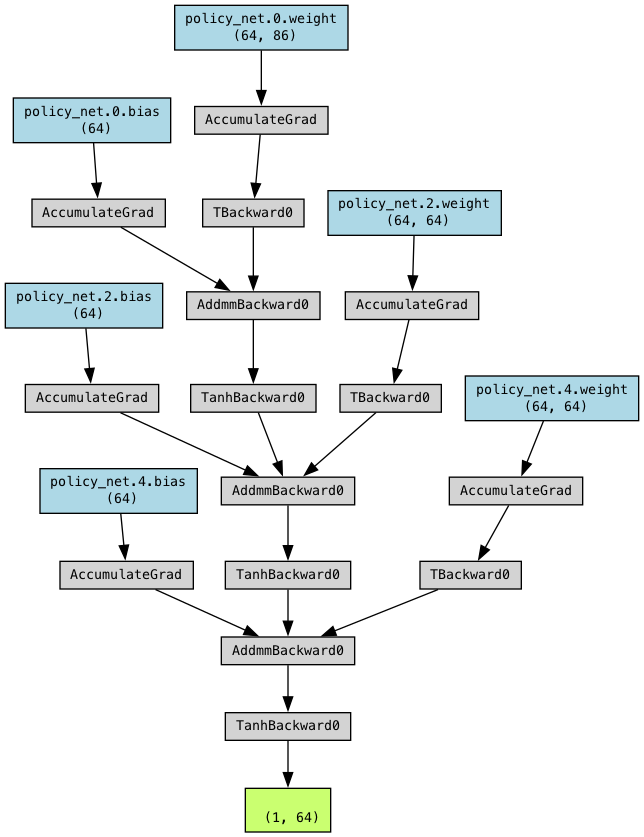

In [ ]:
# https://stackoverflow.com/questions/67036250/understanding-custom-policies-in-stable-baselines3
# https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html#custom-feature-extractor
# https://github.com/DLR-RM/stable-baselines3/blob/master/stable_baselines3/common/policies.py
from torchviz import make_dot
from IPython.display import Image

print(type(my_agent.model.policy.mlp_extractor.policy_net))
print(my_agent.model.policy.mlp_extractor.policy_net)
print(my_agent.model.policy.mlp_extractor.value_net)
print(my_agent.model.policy.action_net)
print(my_agent.model.policy.value_net)

torch_portion = my_agent.model.policy.mlp_extractor
yhat = torch_portion.policy_net(torch.randn(1, 86, dtype=torch.float))
make_dot(yhat, params=dict(list(torch_portion.named_parameters()))).render("torchviz", format="png")
Image(filename='torchviz.png')